In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [18]:
# period = 'daytime'
period = 'nighttime'

In [19]:
filepath = datadir + 'Contribution/RandomForest_output/'
citylist = ['Zhaoqing','Huizhou','Guangzhou','Foshan',
            'Dongguan','Shenzhen','Zhongshan','Jiangmen',
            'Zhuhai']
variants = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES',
            'WSPD10', 'WDIR10', 'CloudFRAC',]

dfs = {}
for city in citylist:
    dfs[city] = pd.read_excel(filepath + f'RF_cities_{period}.xlsx',sheet_name=city,index_col=0)

## 饼图

In [20]:
# 设置各要素对应的颜色
factor_color = {
    'SFC_TMP'  : '#ffbe7a',
    'SOL_RAD'  : '#e88482',
    'RH'       : '#82b0d2',
    'PRES'     : '#beb8dc',
    'WSPD10'   : '#45917c',
    'WDIR10'   : '#799a87',
    'CloudFRAC': '#c5b9a5'
}
custom_colors = [factor_color[factor] for factor in variants]

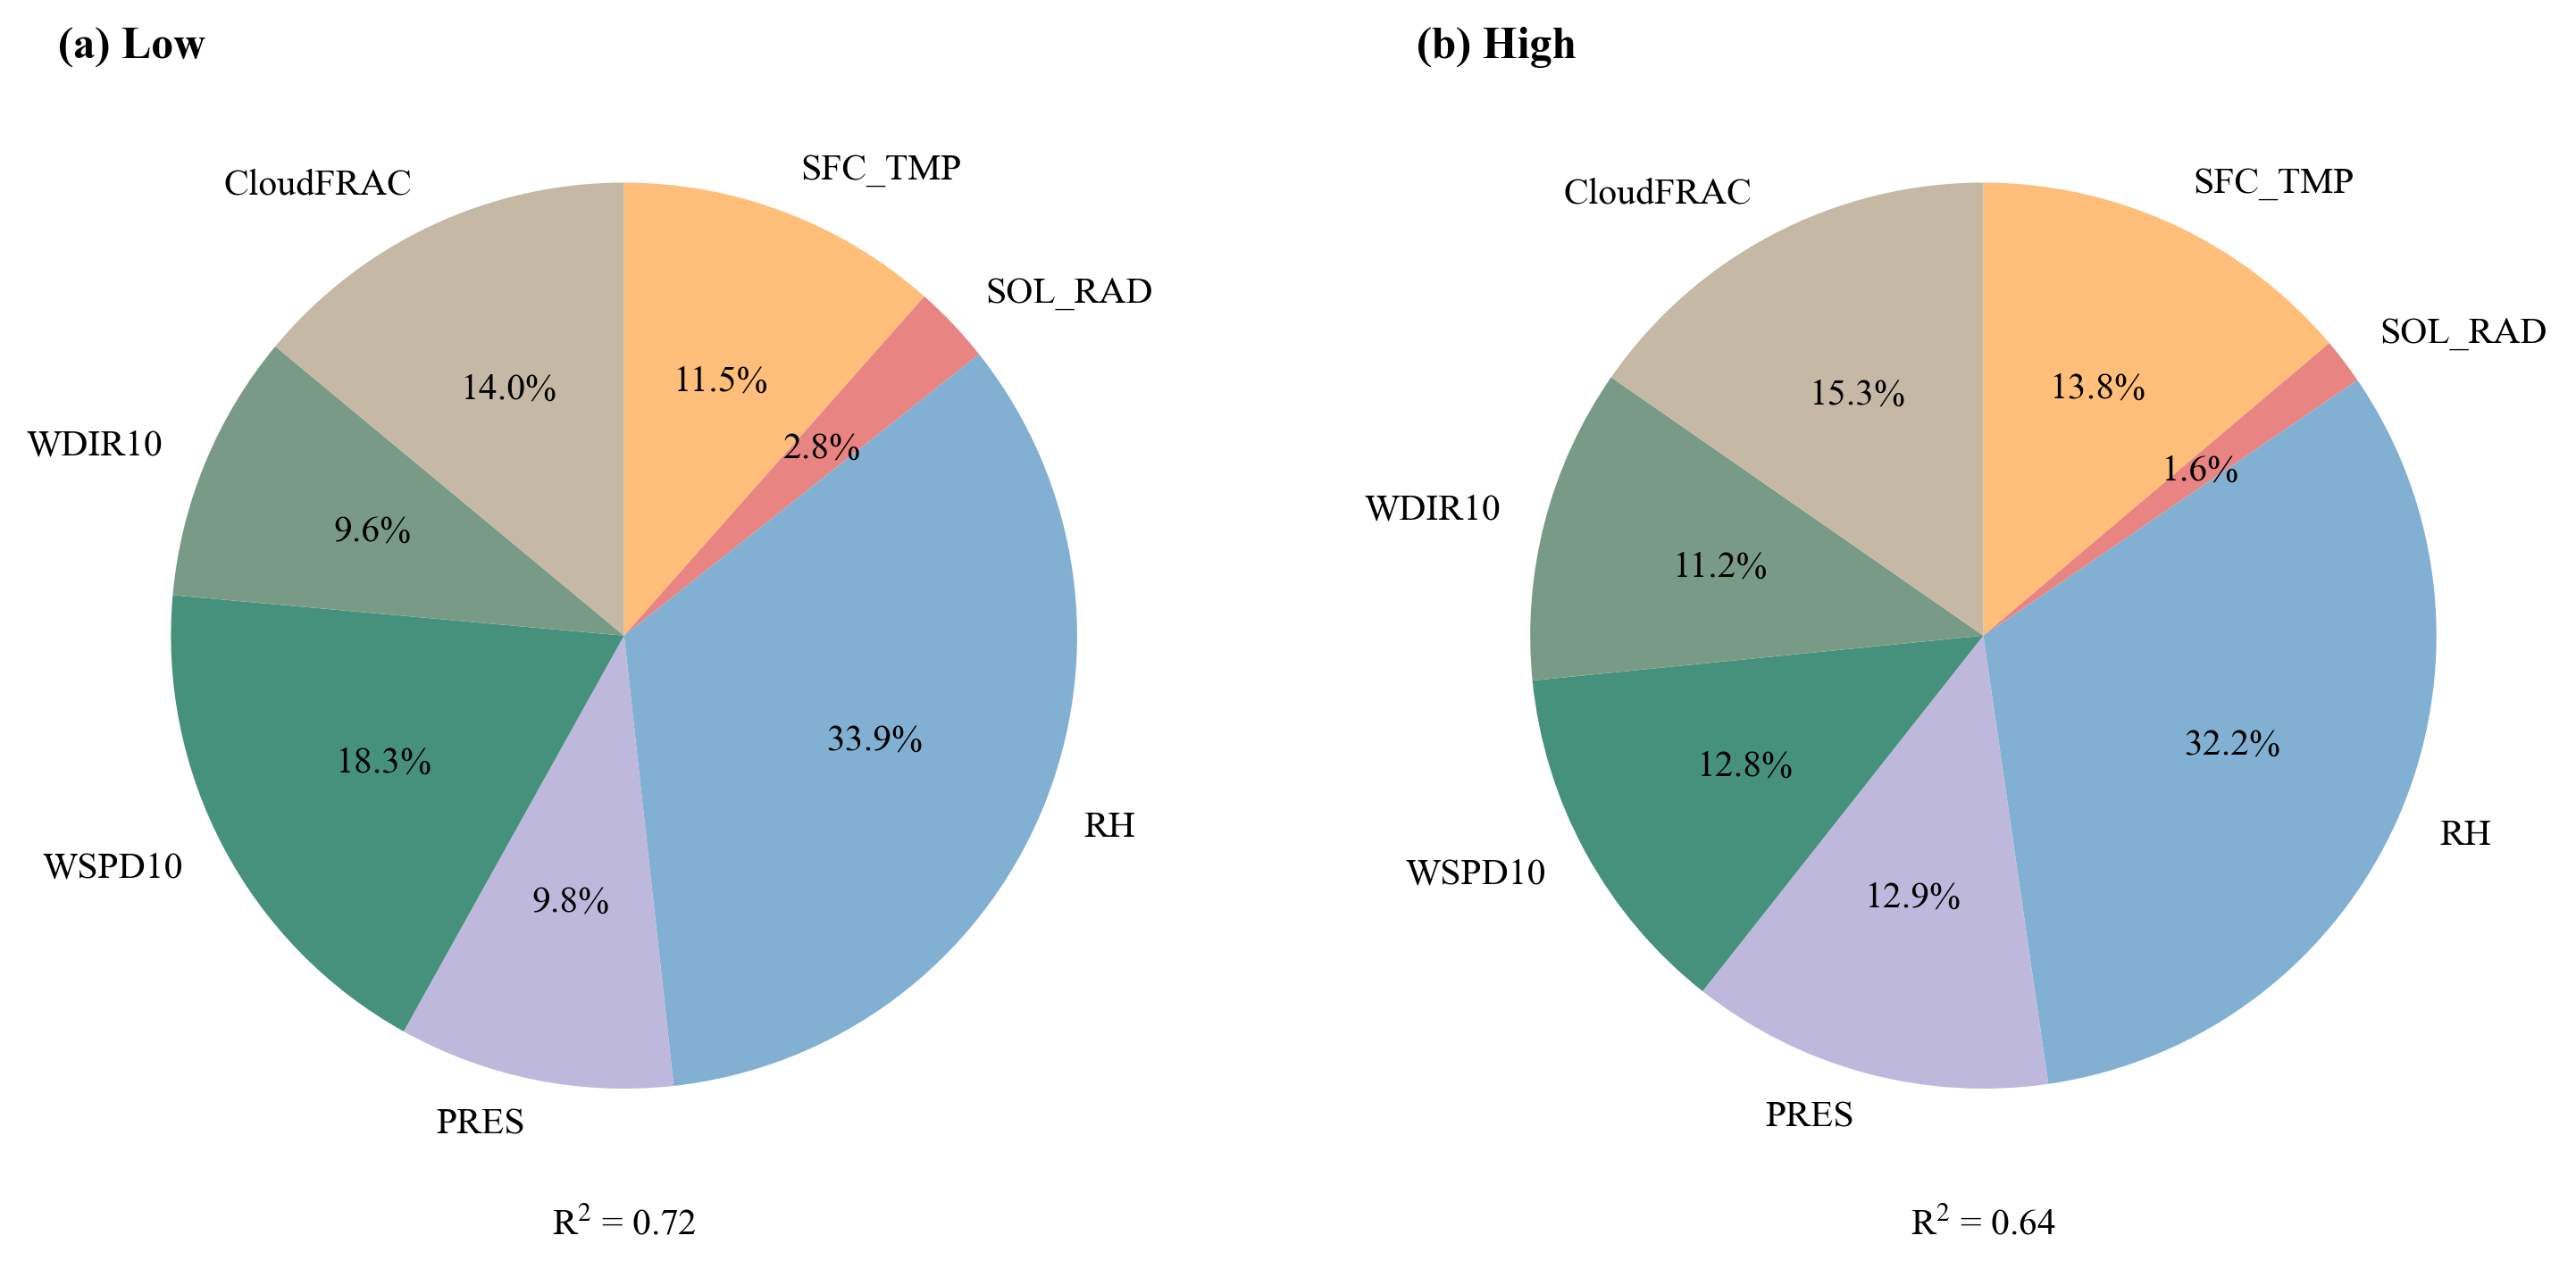

In [21]:
fig = plt.figure(figsize=(12, 6), dpi=300)
ax = fig.subplots(1,2)

pie_dict = dict(
    labels=variants,autopct='%.1f%%',
    startangle=90,counterclock=False,
    colors=custom_colors,
)
    # explode=[0,0.1,0,0,0,0,0],
    # pctdistance=0.4,labeldistance=0.6

font_dict = dict(
    fontsize=12, fontweight='bold',
    loc='left', verticalalignment='center',
)

ax[0].pie(dfs['Guangzhou'].loc[variants,'Low'],**pie_dict)
ax[1].pie(dfs['Guangzhou'].loc[variants,'High'],**pie_dict)

ax[0].set_title('(a) Low',**font_dict)
ax[1].set_title('(b) High',**font_dict)

r2_low_str  = '{:.2f}'.format(dfs['Guangzhou'].loc['r2','Low'])
r2_high_str = '{:.2f}'.format(dfs['Guangzhou'].loc['r2','High'])
ax[0].text(0.5,-0.02,f'R$^2$ = {r2_low_str}',ha='center',va='center',transform=ax[0].transAxes)
ax[1].text(0.5,-0.02,f'R$^2$ = {r2_high_str}',ha='center',va='center',transform=ax[1].transAxes)
plt.show()

In [22]:
outpath = '../../figures/贡献值/pie/'

for city in citylist:
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.subplots(1,2)

    pie_dict = dict(
        labels=variants,autopct='%.1f%%',
        startangle=90,counterclock=False,
        colors=custom_colors,
    )
        # explode=[0,0.1,0,0,0,0,0],
        # pctdistance=0.4,labeldistance=0.6

    font_dict = dict(
        fontsize=12, fontweight='bold',
        loc='left', verticalalignment='center',
    )

    ax[0].pie(dfs[city].loc[variants,'Low'],**pie_dict)
    ax[1].pie(dfs[city].loc[variants,'High'],**pie_dict)

    ax[0].set_title('(a) Low',**font_dict)
    ax[1].set_title('(b) High',**font_dict)
    
    plt.savefig(outpath + f'{city}_{period}.png',dpi=300,transparent=True,)#bbox_inches='tight')
    plt.close()
    
    #! Difference
    fig = plt.figure(figsize=(6, 6), dpi=300)
    ax = fig.subplots(1,1)

    ax.pie(dfs[city].loc[variants,'Diff'],**pie_dict)

    ax.set_title('(c) Diff',**font_dict)
    
    plt.savefig(outpath + f'{city}_{period}_diff.png',dpi=300,transparent=True,)
    plt.close()
    
    print(f'{city}')

Zhaoqing
Huizhou
Guangzhou
Foshan
Dongguan
Shenzhen
Zhongshan
Jiangmen
Zhuhai


In [23]:
dfprd = pd.read_excel(filepath + 'RF_PRD_diurnal.xlsx',index_col=0)
outpath = '../../figures/贡献值/pie/'

fig = plt.figure(figsize=(12, 6), dpi=300)
ax = fig.subplots(1,2)

pie_dict = dict(
    labels=variants,autopct='%.1f%%',
    startangle=90,counterclock=False,
    colors=custom_colors,
)
    # explode=[0,0.1,0,0,0,0,0],
    # pctdistance=0.4,labeldistance=0.6

font_dict = dict(
    fontsize=12, fontweight='bold',
    loc='left', verticalalignment='center',
)

ax[0].pie(dfprd.loc[variants,'Low'],**pie_dict)
ax[1].pie(dfprd.loc[variants,'High'],**pie_dict)

ax[0].set_title('(a) Low',**font_dict)
ax[1].set_title('(b) High',**font_dict)

plt.savefig(outpath + f'PRD_{period}.png',dpi=300,transparent=True,)
plt.close()

fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.subplots(1,1)

ax.pie(dfprd.loc[variants,'Diff'],**pie_dict)

ax.set_title('(c) Diff',**font_dict)

plt.savefig(outpath + f'PRD_{period}_diff.png',dpi=300,transparent=True,)
plt.close()

## 饼图围绕地图

In [24]:
# 设置各城市首要因子
city_factor_low  = {city: dfs[city].loc[variants,'Low'].sort_values(ascending=False).index[0] for city in citylist}
city_factor_high = {city: dfs[city].loc[variants,'High'].sort_values(ascending=False).index[0] for city in citylist}
city_factor_diff = {city: dfs[city].loc[variants,'Diff'].sort_values(ascending=False).index[0] for city in citylist}

# 将城市与颜色连接
city_color_low = {city: factor_color[factor] for city, factor in city_factor_low.items()}
city_color_high = {city: factor_color[factor] for city, factor in city_factor_high.items()}
city_color_diff = {city: factor_color[factor] for city, factor in city_factor_diff.items()}

In [25]:
# 设置饼图在子图中的位置
city_position = {
    'Zhaoqing' : (1,0),
    'Huizhou'  : (0,3),
    'Guangzhou': (0,2),
    'Foshan'   : (0,1),
    'Dongguan' : (1,3),
    'Shenzhen' : (2,3),
    'Zhongshan': (3,2),
    'Jiangmen' : (2,0),
    'Zhuhai'   : (3,1)
}

shps = {}
for city in citylist:
    shps[city] = Reader(eval(f'shp_{city}_adm'))

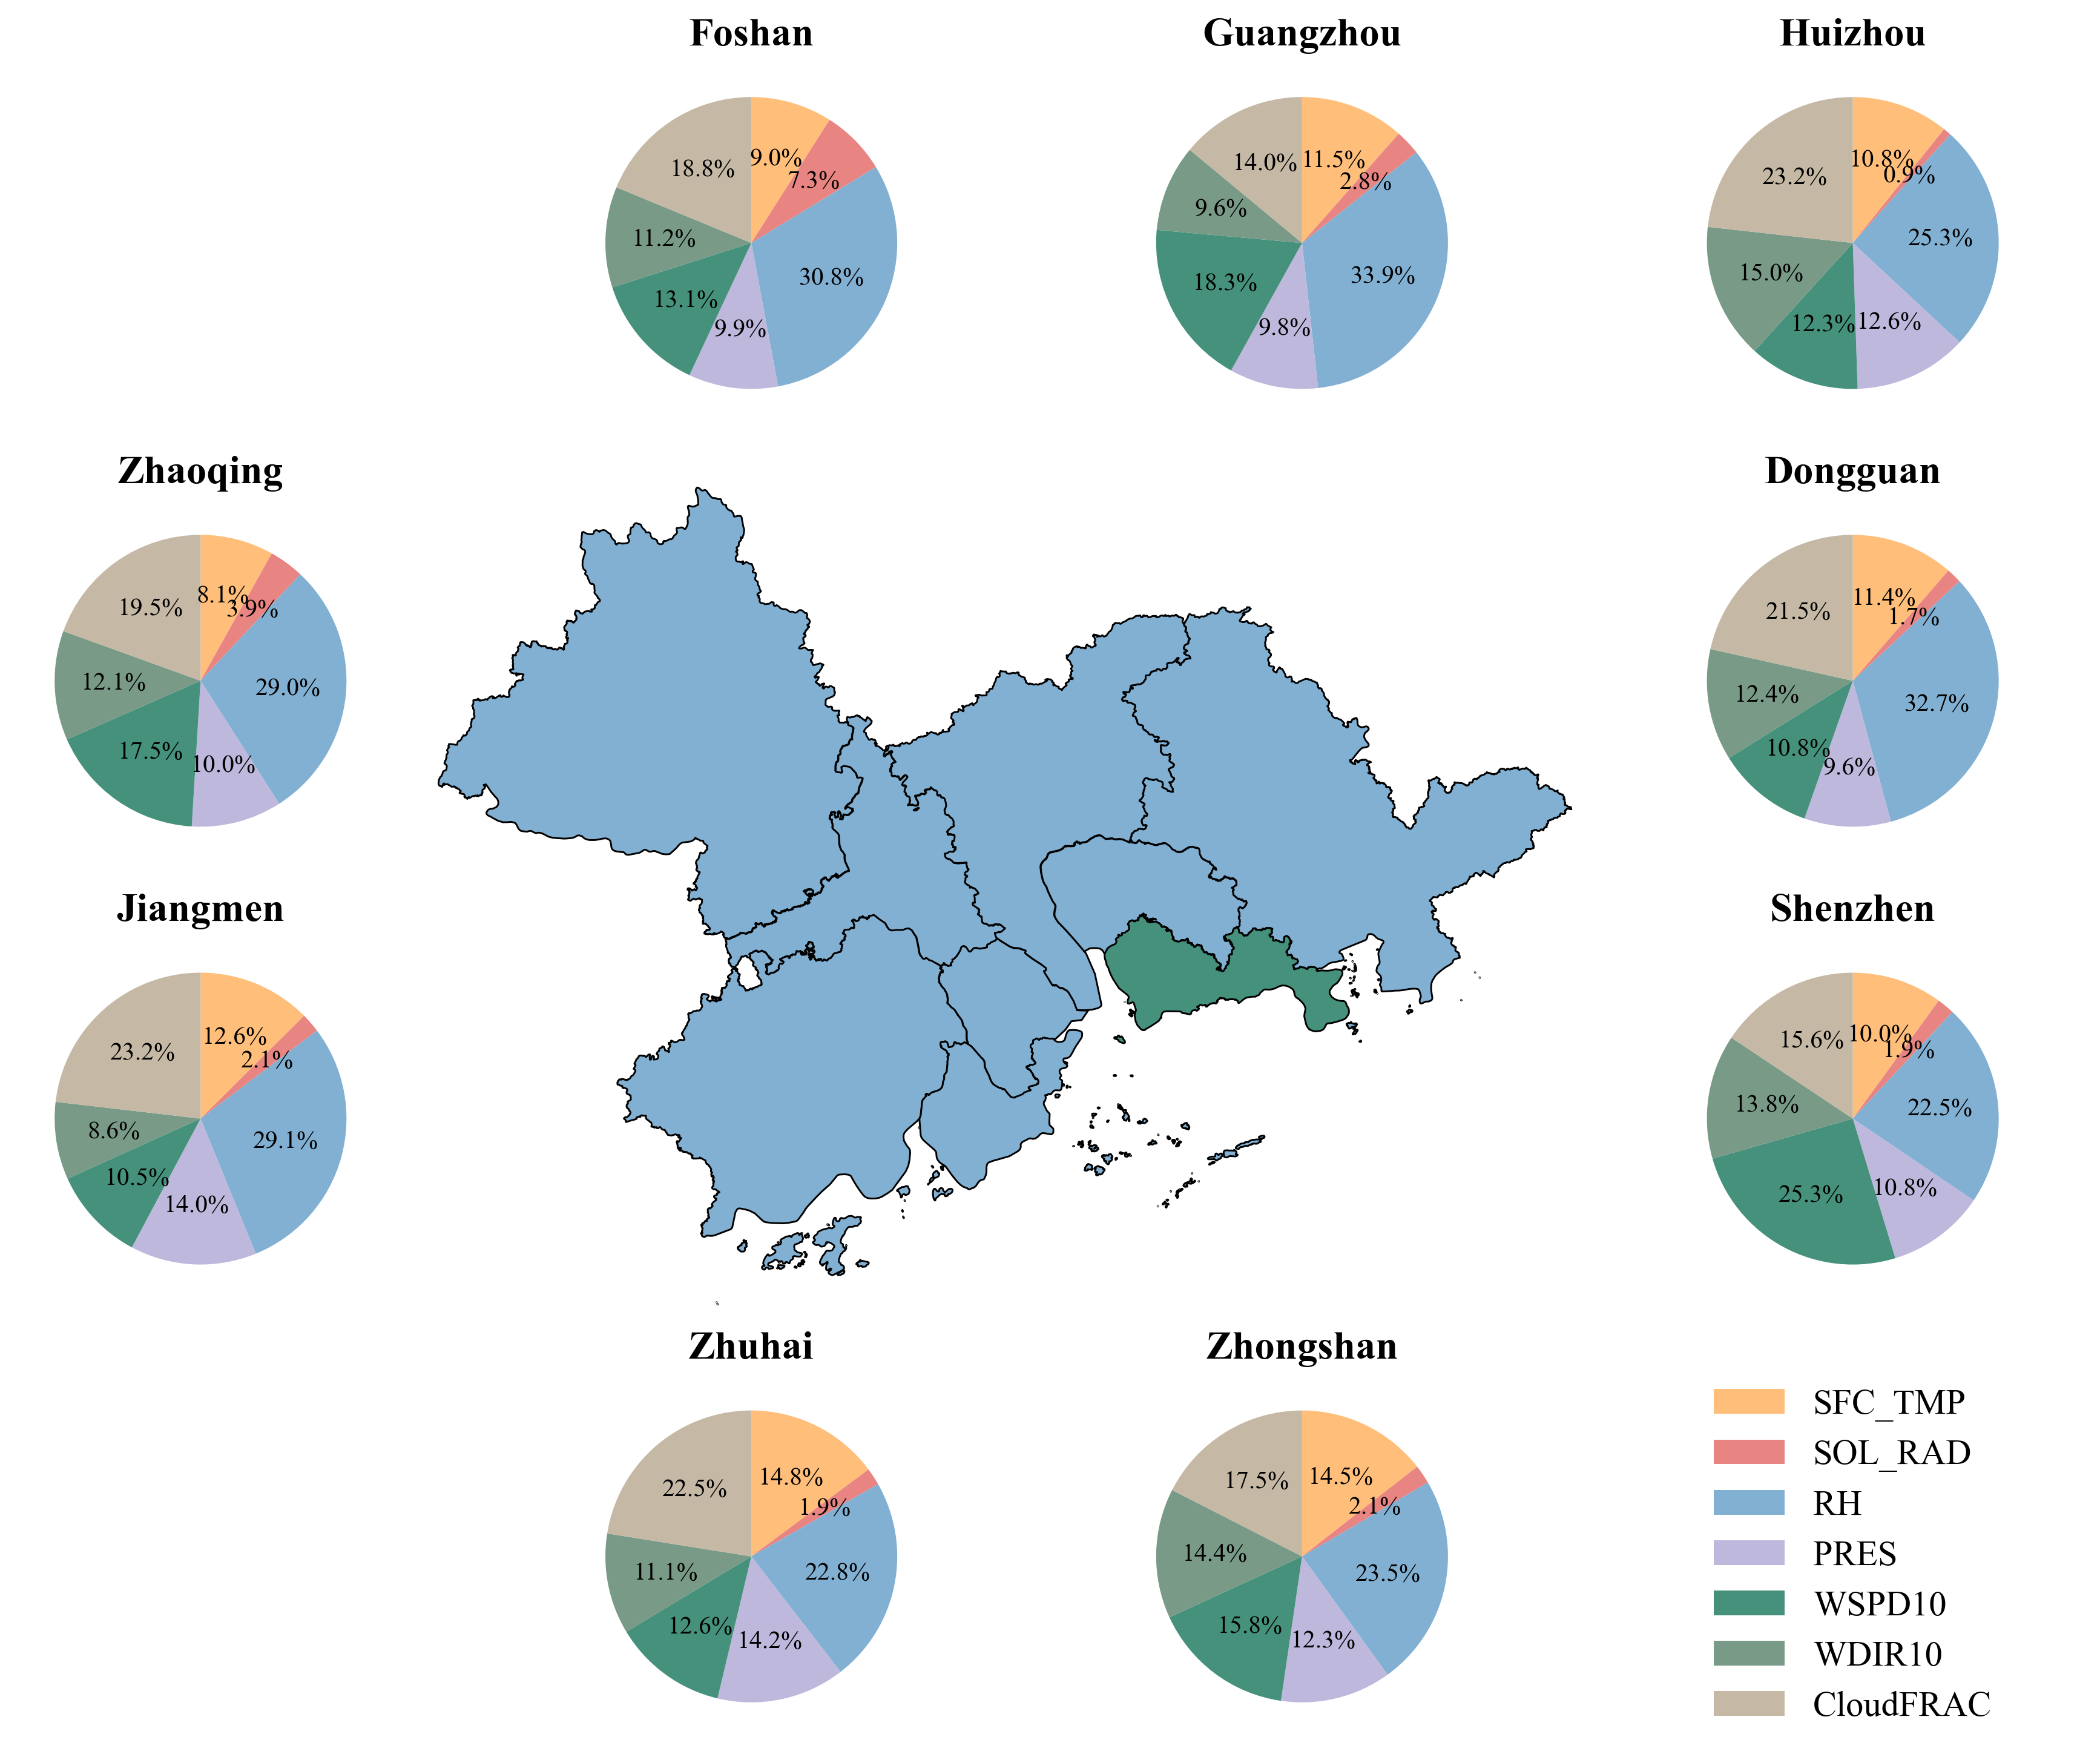

In [26]:
pie_dict = dict(
    labels=None,autopct='%.1f%%',
    startangle=90,counterclock=False,
    colors=custom_colors,
)
    # labeldistance=0.5,
    # pctdistance=0.4,
    # explode=[0,0.1,0,0,0,0,0],


fig = plt.figure(figsize=(15, 12), dpi=300)

# 创建地图子图
ax_map = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax_map.set_extent([111.2, 115.5, 21.4, 24.5], ccrs.PlateCarree())
ax_map.set_position([0.28,0.28,0.44,0.44])

# 添加城市边界线
for city in citylist:
    ax_map.add_feature(cfeat.ShapelyFeature(
        shps[city].geometries(), ccrs.PlateCarree(), 
        facecolor=city_color_low[city], edgecolor='k'
        ), linewidth=0.7)
ax_map.axis('off')

# 创建饼图子图网格
ax_pie_grid = plt.GridSpec(4, 4, figure=fig, hspace=0.2, wspace=0.2)

# 在最外圈位置创建饼图
for i, city in enumerate(citylist):
    # 创建饼图子图
    outer_row = city_position[city][0]
    outer_col = city_position[city][1]
    ax_pie = fig.add_subplot(ax_pie_grid[outer_row, outer_col], aspect='equal')
    
    # 绘制饼图
    pie = ax_pie.pie(dfs[city].loc[variants, 'Low'], **pie_dict)
    ax_pie.set_title(city,fontweight='bold',fontsize=16)

ax_legend = fig.add_subplot(ax_pie_grid[3, 3], aspect='equal')
for var in variants:
    ax_legend.bar(0, 0, color=factor_color[var], label=var)
ax_legend.legend(loc='center',frameon=False,fontsize=14)
ax_legend.axis('off')

plt.show()


In [27]:
outpath = '../../figures/贡献值/pie_map/'
items = ['Low','High','Diff']

for item in items:
    item_lower = item.lower()
    
    fig = plt.figure(figsize=(15, 12), dpi=300)

    # 创建地图子图
    ax_map = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax_map.set_extent([111.2, 115.5, 21.4, 24.5], ccrs.PlateCarree())
    ax_map.set_position([0.28,0.28,0.44,0.44])

    # 添加城市边界线
    for city in citylist:
        ax_map.add_feature(cfeat.ShapelyFeature(
            shps[city].geometries(), ccrs.PlateCarree(), 
            facecolor=eval(f'city_color_{item_lower}[city]'), edgecolor='k'
            ), linewidth=0.7)
    ax_map.axis('off')

    # 创建饼图子图网格
    ax_pie_grid = plt.GridSpec(4, 4, figure=fig, hspace=0.2, wspace=0.2)

    # 在最外圈位置创建饼图
    for i, city in enumerate(citylist):
        # 创建饼图子图
        outer_row = city_position[city][0]
        outer_col = city_position[city][1]
        ax_pie = fig.add_subplot(ax_pie_grid[outer_row, outer_col], aspect='equal')
        
        # 绘制饼图
        pie = ax_pie.pie(dfs[city].loc[variants, item], **pie_dict)
        ax_pie.set_title(city,fontweight='bold',fontsize=16)

    ax_legend = fig.add_subplot(ax_pie_grid[3, 3], aspect='equal')
    for var in variants:
        ax_legend.bar(0, 0, color=factor_color[var], label=var)
    ax_legend.legend(loc='center',frameon=False,fontsize=14)
    ax_legend.axis('off')

    plt.savefig(outpath + f'{item_lower}_{period}.png',dpi=300,transparent=True)
    print(item)
    plt.close()


Low
High
Diff
